Problem 1.a

SQNR = 74.0 db
SNR = 67.47386557473212 db


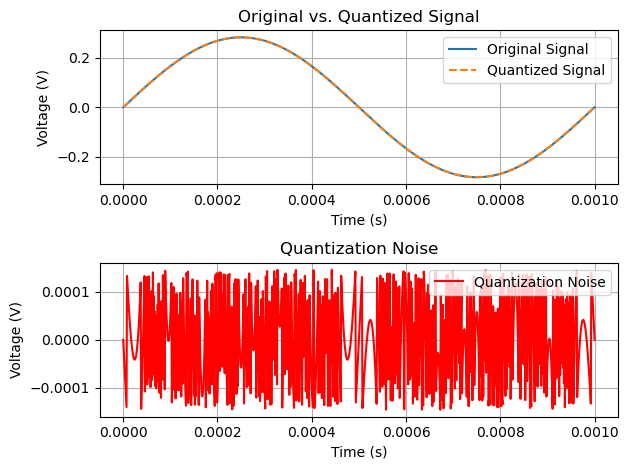

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = 0.2
N = 12
FSR = 1.2
LSB = FSR/(2**12-1)
quant_noise_power = LSB**2/12
signal_power = A**2

t = np.linspace(0, 1e-3, 1000)
signal = A*np.sqrt(2)*np.sin(2*np.pi*1e3*t)
quantized_signal = np.round(signal / LSB) * LSB
quantization_noise = quantized_signal - signal

SQNR = 6.02*N+1.76
SNR = 10*np.log10(signal_power/quant_noise_power)
print(f"SQNR = {SQNR} db")
print(f"SNR = {SNR} db")

plt.subplot(2, 1, 1)
plt.plot(t, signal, label="Original Signal")
plt.plot(t, quantized_signal, label="Quantized Signal", linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Original vs. Quantized Signal")
plt.legend()
plt.grid()

# Plot quantization noise
plt.subplot(2, 1, 2)
plt.plot(t, quantization_noise, label="Quantization Noise", color='r')
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Quantization Noise")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Problem 1.b

In [3]:
gauss_noise = 0.5
SNR_input = 10*np.log(signal_power/(gauss_noise**2))
SNR_output = 10*np.log(signal_power/(quant_noise_power+gauss_noise**2))
print(f"SNR input = {SNR_input} db")
print(f"SNR output = {SNR_output} db")

SNR input = -18.3258146374831 db
SNR output = -18.32581492372514 db


Problem 1.c

In [5]:
noise_pp = 1
noise_power = noise_pp**2/12
SNR_input = 10*np.log(signal_power/noise_power)
SNR_output = 10*np.log(signal_power/(quant_noise_power+noise_power))
print(f"SNR input = {SNR_input} db")
print(f"SNR output = {SNR_output} db")

SNR input = -7.339691750802002 db
SNR output = -7.339692609528098 db


Problem 2

Problem 3.a

offset error = 0.01 mV
full scale error = 0.05 mV


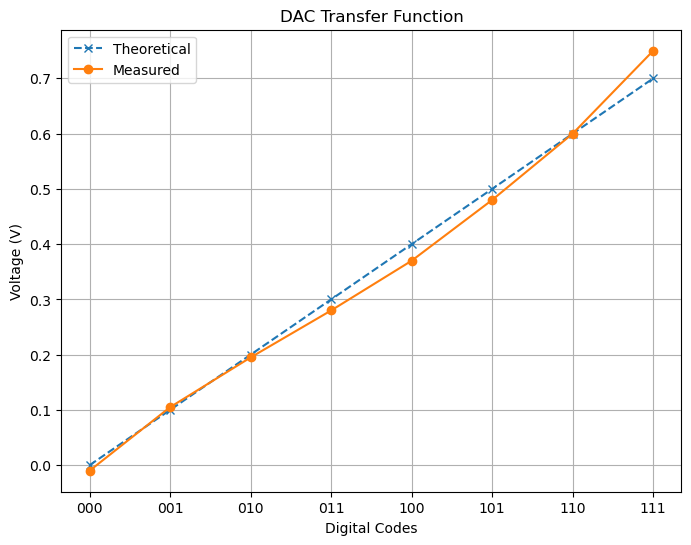

In [7]:
#given DAC parameters
N = 3
LSB = 0.1
codes = ["000", "001", "010", "011", "100", "101", "110", "111"]
theoretical_voltages = np.arange(0,0.8,LSB)
measured_voltages = np.array([-0.01, 0.105, 0.195, 0.28, 0.37, 0.48, 0.6, 0.75])

offset_error = np.abs(measured_voltages[0] - theoretical_voltages[0])
full_scale_error = max(np.abs(measured_voltages - theoretical_voltages))
print(f"offset error = {offset_error} mV")
print(f"full scale error = {full_scale_error:.2f} mV")

plt.figure(figsize=(8, 6))
plt.plot(codes, theoretical_voltages, marker='x', linestyle='--', label='Theoretical')
plt.plot(codes, measured_voltages, marker='o', linestyle='-', label='Measured')

plt.ylabel('Voltage (V)')
plt.xlabel('Digital Codes')
plt.title('DAC Transfer Function')
plt.legend()
plt.grid(True)
plt.show()

Problem 3.b

In [9]:
measured_voltages += 0.01 #compensate offset error

gain_error = measured_voltages[-1] - theoretical_voltages[-1]
print(f"gain error = {gain_error:.2f} mV")


gain error = 0.06 mV


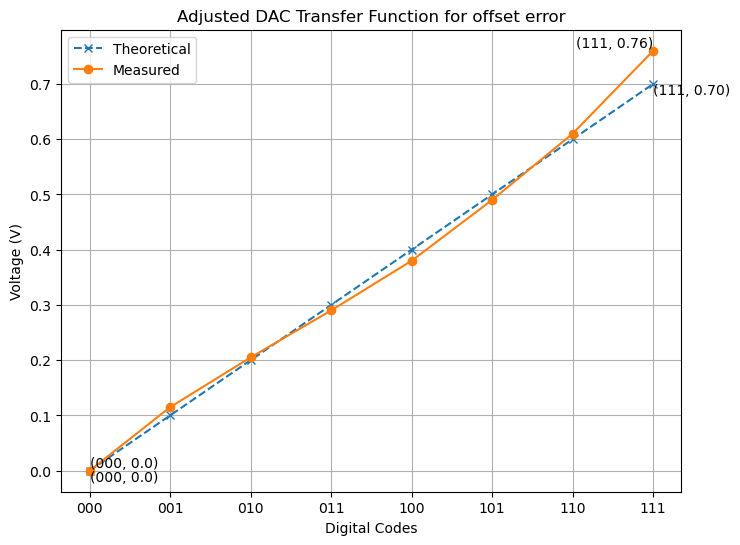

In [11]:
#Plot updated DAC transfer function

plt.figure(figsize=(8, 6))
plt.plot(codes, theoretical_voltages, marker='x', linestyle='--', label='Theoretical')
plt.plot(codes, measured_voltages, marker='o', linestyle='-', label='Measured')

plt.text(codes[0], theoretical_voltages[0], f"({codes[0]}, {theoretical_voltages[0]:.1f})", ha='left', va='bottom')
plt.text(codes[-1], theoretical_voltages[-1], f"({codes[-1]}, {theoretical_voltages[-1]:.2f})", ha='left', va='top')

plt.text(codes[0], measured_voltages[0], f"({codes[0]}, {measured_voltages[0]:.1f})", ha='left', va='top')
plt.text(codes[-1], measured_voltages[-1], f"({codes[-1]}, {measured_voltages[-1]:.2f})", ha='right', va='bottom')

plt.ylabel('Voltage (V)')
plt.xlabel('Digital Codes')
plt.title('Adjusted DAC Transfer Function for offset error')
plt.legend()
plt.grid(True)
plt.show()

Problem 3.c

In [13]:
#Compendate gain error
gain_correction = theoretical_voltages[-1] / measured_voltages[-1]
measured_voltages *= gain_correction
print(f"gain error factor = {gain_correction}")

gain error factor = 0.9210526315789475


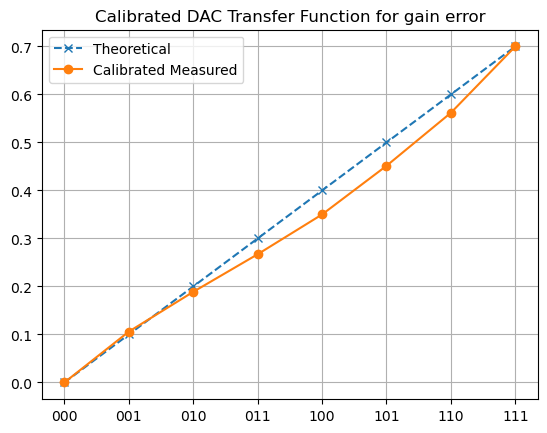

In [15]:
plt.plot(codes, theoretical_voltages, 'x--', label='Theoretical')
plt.plot(codes, measured_voltages, 'o-', label='Calibrated Measured')
plt.title('Calibrated DAC Transfer Function for gain error')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
#Compute DNL
step_sizes = np.diff(measured_voltages)
DNL = (step_sizes / LSB) - 1
print("measured voltages:", measured_voltages)
print("step sizes:", step_sizes)
print("DNL:", DNL)

measured voltages: [0.         0.10592105 0.18881579 0.26710526 0.35       0.45131579
 0.56184211 0.7       ]
step sizes: [0.10592105 0.08289474 0.07828947 0.08289474 0.10131579 0.11052632
 0.13815789]
DNL: [ 0.05921053 -0.17105263 -0.21710526 -0.17105263  0.01315789  0.10526316
  0.38157895]


In [19]:
for i, dnl in enumerate(DNL):
    print(f"Code {i}: DNL = {dnl:.3f} LSB")

Code 0: DNL = 0.059 LSB
Code 1: DNL = -0.171 LSB
Code 2: DNL = -0.217 LSB
Code 3: DNL = -0.171 LSB
Code 4: DNL = 0.013 LSB
Code 5: DNL = 0.105 LSB
Code 6: DNL = 0.382 LSB


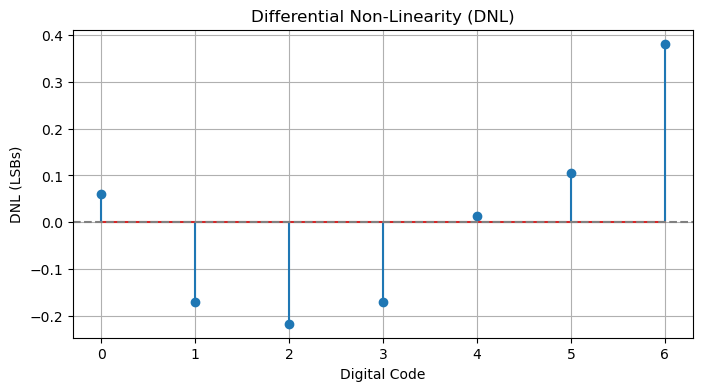

In [21]:
plt.figure(figsize=(8, 4))
plt.stem(range(len(DNL)), DNL)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Differential Non-Linearity (DNL)')
plt.xlabel('Digital Code')
plt.ylabel('DNL (LSBs)')
plt.grid(True)
plt.show()

In [23]:
INL = (measured_voltages-theoretical_voltages)/LSB
print("INL:", INL)

INL: [ 0.          0.05921053 -0.11184211 -0.32894737 -0.5        -0.48684211
 -0.38157895  0.        ]


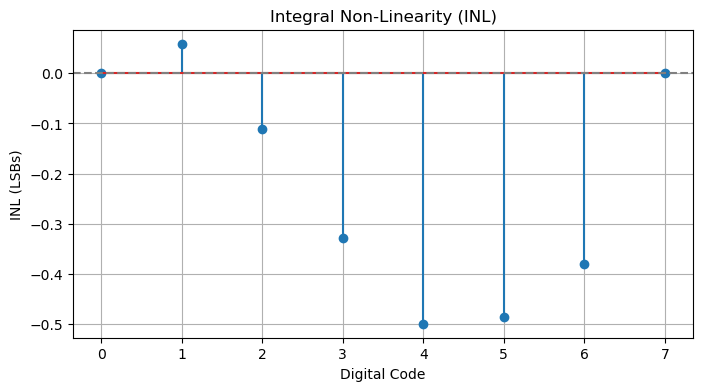

In [25]:
plt.figure(figsize=(8, 4))
plt.stem(range(len(INL)), INL)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Integral Non-Linearity (INL)')
plt.xlabel('Digital Code')
plt.ylabel('INL (LSBs)')
plt.grid(True)
plt.show()

Problem 3.d

In [27]:
max_DNL = np.max(np.abs(DNL))
max_INL = np.max(np.abs(INL))
print(f"max DNL = {max_DNL:.5f}, max INL = {max_INL:.1f}")

max DNL = 0.38158, max INL = 0.5


Problem 4.a

In [29]:
import numpy as np
import matplotlib.pyplot as plt

hist = np.array([43, 115, 85, 101, 122, 170, 75, 146, 
                 125, 60, 95, 95, 115, 40, 120, 242])

total_samples = np.sum(hist)
ideal = total_samples / len(hist)

hist_DNL = (hist - ideal) / ideal
hist_INL = np.cumsum(hist_DNL)

In [31]:
for i in range(len(hist)):
    print(f"Code {i:2}: Count = {hist[i]:3}, DNL = {hist_DNL[i]:+.3f} LSB, INL = {hist_INL[i]:+.3f} LSB")

Code  0: Count =  43, DNL = -0.607 LSB, INL = -0.607 LSB
Code  1: Count = 115, DNL = +0.052 LSB, INL = -0.555 LSB
Code  2: Count =  85, DNL = -0.222 LSB, INL = -0.777 LSB
Code  3: Count = 101, DNL = -0.076 LSB, INL = -0.853 LSB
Code  4: Count = 122, DNL = +0.116 LSB, INL = -0.737 LSB
Code  5: Count = 170, DNL = +0.555 LSB, INL = -0.182 LSB
Code  6: Count =  75, DNL = -0.314 LSB, INL = -0.496 LSB
Code  7: Count = 146, DNL = +0.336 LSB, INL = -0.160 LSB
Code  8: Count = 125, DNL = +0.144 LSB, INL = -0.017 LSB
Code  9: Count =  60, DNL = -0.451 LSB, INL = -0.468 LSB
Code 10: Count =  95, DNL = -0.131 LSB, INL = -0.599 LSB
Code 11: Count =  95, DNL = -0.131 LSB, INL = -0.730 LSB
Code 12: Count = 115, DNL = +0.052 LSB, INL = -0.678 LSB
Code 13: Count =  40, DNL = -0.634 LSB, INL = -1.312 LSB
Code 14: Count = 120, DNL = +0.098 LSB, INL = -1.214 LSB
Code 15: Count = 242, DNL = +1.214 LSB, INL = +0.000 LSB


Problem 4.b

In [33]:
print(f"max DNL = {np.max(np.abs(hist_DNL)):.5f} LSB")
print(f"max INL = {np.max(np.abs(hist_INL)):.5f} LSB")

max DNL = 1.21384 LSB
max INL = 1.31161 LSB


Problem 4.c

In [35]:
print("Yes this ADC is monotonic since the peak DNL and INL values are greater than 1 LSB")

Yes this ADC is monotonic since the peak DNL and INL values are greater than 1 LSB


Problem 5.a

In [63]:
ADC_DNL = np.array([0, -0.5, 0, 0.5, -1, 0.5, 0.5, 0])
ADC_offset_error = 0.5
ADC_fs_error = 0.5

ADC_INL = np.zeros(8)
ADC_INL[0] = ADC_DNL[0]
for i in range(1,8):
    ADC_INL[i] = ADC_INL[i-1] + ADC_DNL[i]

ADC_INL = np.array(ADC_INL)
print(f"INL = {ADC_INL} LSB")

INL = [ 0.  -0.5 -0.5  0.  -1.  -0.5  0.   0. ] LSB


Problem 5.b

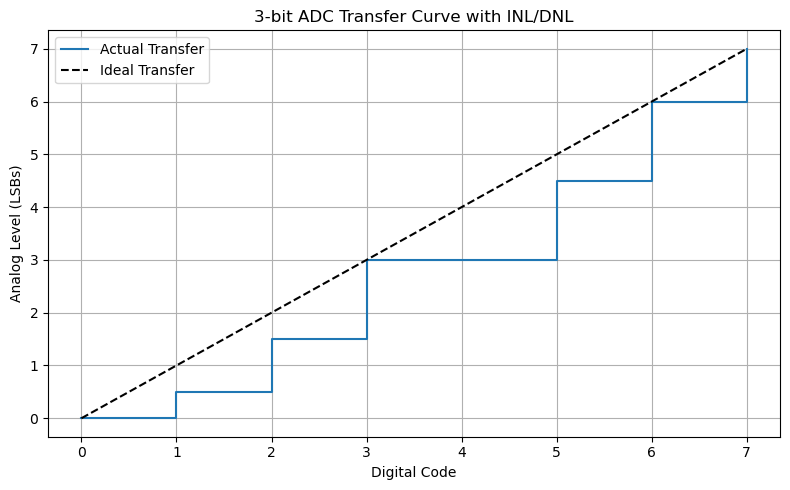

In [65]:
ideal_transitions = np.arange(8)

# Actual transitions
actual_transitions = ideal_transitions + ADC_INL

# Plot transfer curve
plt.figure(figsize=(8, 5))
plt.step(ideal_transitions, actual_transitions, where='post', label='Actual Transfer')
plt.plot(ideal_transitions, ideal_transitions, 'k--', label='Ideal Transfer')
plt.xlabel('Digital Code')
plt.ylabel('Analog Level (LSBs)')
plt.title('3-bit ADC Transfer Curve with INL/DNL')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Problem 6.a

Problem 6.b

Problem 6.c

Problem 6.d

LAB EXPERIMENT PART 2

In [39]:
Vin = np.array([0, 0.01315, 0.0525, 0.118125, 0.2099, 0.3279375, 0.47235, 0.64225])
output_codes = np.array(codes)

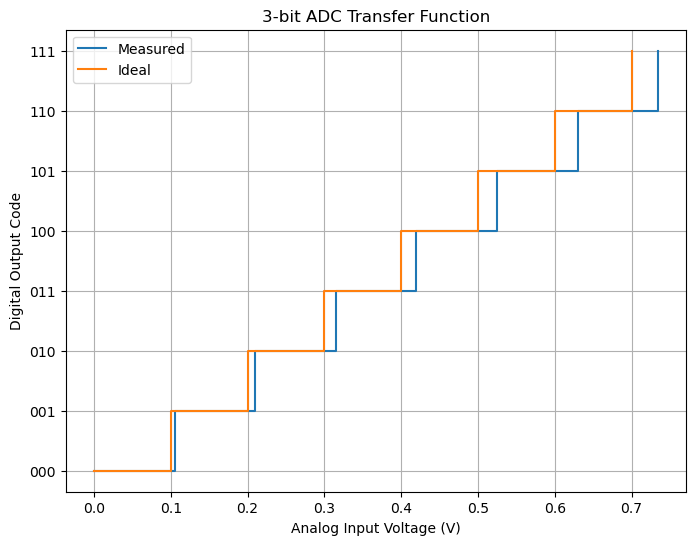

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
codes = ["000", "001", "010", "011", "100", "101", "110", "111"]
Vref = np.array([0, 0.1052, 0.21, 0.315, 0.4198, 0.5247, 0.6298, 0.734])
Vref_ideal = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
Vin = []
Vin_ideal = []

for i in range(len(Vref)):
    Vin.append(Vref[i]/8*i)
    Vin_ideal.append(Vref_ideal[i]/8*i)
    
Vin = np.array(Vin)
Vin_ideal = np.array(Vin_ideal)


# Plotting with step function
plt.figure(figsize=(8, 6))
plt.step(Vref, np.arange(len(codes)), where='post', label='Measured')
plt.step(Vref_ideal, np.arange(len(codes)), where='post', label='Ideal')


plt.yticks(np.arange(len(codes)), codes)
plt.ylabel('Digital Output Code')
plt.xlabel('Analog Input Voltage (V)')
plt.title('3-bit ADC Transfer Function')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
offset_error = np.abs(Vref[1] - Vref_ideal[1])
fs_error = np.abs(Vref[-1] - Vref_ideal[-1])
gain_error = ((Vref[-1]+1) - (Vref_ideal[1])-1)/7

print(f"offset error = {offset_error:.3f}")
print(f"full-scale error = {fs_error:.3f}")
print(f"gain error = {gain_error:.3f}")

offset error = 0.005
full-scale error = 0.034
gain error = 0.091


In [45]:
step_sizes = np.diff(Vref)
DNL = (step_sizes / LSB) - 1
print("measured voltages:", Vref)
print("step sizes:", step_sizes)
print("DNL:", DNL)

measured voltages: [0.     0.1052 0.21   0.315  0.4198 0.5247 0.6298 0.734 ]
step sizes: [0.1052 0.1048 0.105  0.1048 0.1049 0.1051 0.1042]
DNL: [0.052 0.048 0.05  0.048 0.049 0.051 0.042]


In [47]:
INL = (Vref-Vref_ideal)/LSB
print("INL:", INL)

INL: [0.    0.052 0.1   0.15  0.198 0.247 0.298 0.34 ]
